# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "/content/Mouse_metadata.csv"
study_results_path = "/content/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_combine = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
data_combine.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
mice_number = mouse_metadata['Mouse ID'].nunique()
mice_number

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = data_combine[data_combine.duplicated(['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_data = data_combine[data_combine['Mouse ID'] == 'g989']
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_combine = data_combine.drop(data_combine[data_combine['Mouse ID'] == 'g989'].index)
clean_data_combine.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mice_number = clean_data_combine['Mouse ID'].nunique()
clean_mice_number

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
mean = clean_data_combine.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_data_combine.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
varianace = clean_data_combine.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_dev = clean_data_combine.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
SEM = clean_data_combine.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary = pd.DataFrame({"Mean Tumor Volume": mean,
                        "Median Tumor Volume": median,
                        "Tumor Volume Variance": varianace,
                        "Tumor Volume Std. Dev.": std_dev,
                        "Tumor Volume Std. Err.": SEM})
summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary = clean_data_combine.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

summary


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

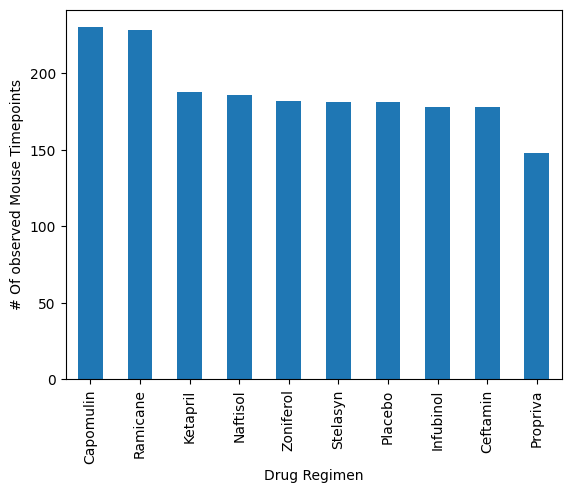

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# create a bar plot of the counts
regimen_counts = clean_data_combine['Drug Regimen'].value_counts()
regimen_counts.plot(kind='bar')

plt.xlabel('Drug Regimen')
plt.ylabel('# Of observed Mouse Timepoints')
plt.show()

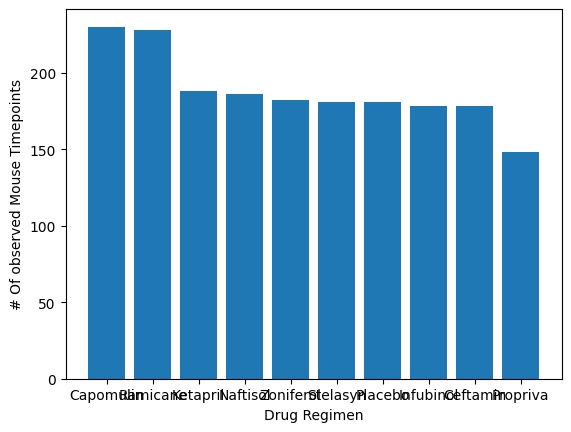

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import matplotlib.pyplot as plt

plt.bar(regimen_counts.index, regimen_counts.values)
plt.xlabel('Drug Regimen')
plt.ylabel('# Of observed Mouse Timepoints')

plt.show()

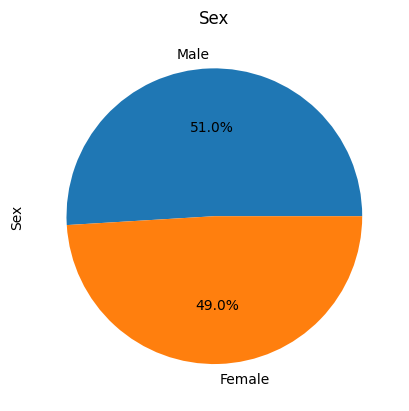

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = clean_data_combine['Sex'].value_counts()
clean_data_combine['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Sex')
plt.show()

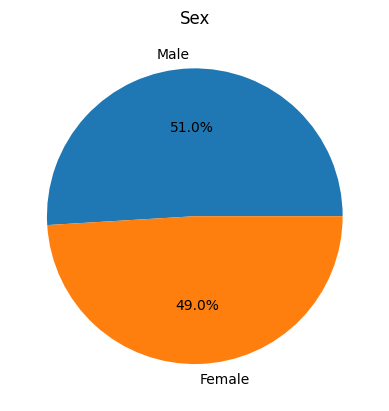

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# create a pie plot
plt.pie(sex_counts.values, labels=sex_counts.index, autopct='%1.1f%%')
plt.title('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# create a list of the four drug regimens
regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# filter the data for the four drug regimens
filtered_data = data_combine[data_combine['Drug Regimen'].isin(regimens)]

# get the last timepoint for each mouse
last_timepoint = filtered_data.groupby('Mouse ID')['Timepoint'].max()

# merge the last timepoint with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, filtered_data, on=['Mouse ID', 'Timepoint']) #data_combine

# display the final tumor volume DataFrame for preview
final_tumor_volume.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [15]:

# create a list of the four drug regimens
regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# loop through the list of drug regimens and calculate the IQR and potential outliers
for regimen in regimens:
    # filter the tumor volume data for the current regimen
    tumor_volume_data_regimen = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == regimen, 'Tumor Volume (mm3)']

    # calculate the quartiles and IQR for the current regimen
    quartiles = tumor_volume_data_regimen.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # calculate the lower and upper bounds for potential outliers for the current regimen
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    # identify the potential outliers for the current regimen
    outliers = tumor_volume_data_regimen.loc[(tumor_volume_data_regimen < lower_bound) | (tumor_volume_data_regimen > upper_bound)]

    # print the results for the current regimen
    if outliers.empty:
        print(f"{regimen}'s potential outliers: {outliers}")
    else:
        print(f"{regimen}'s potential outliers: {outliers.values}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


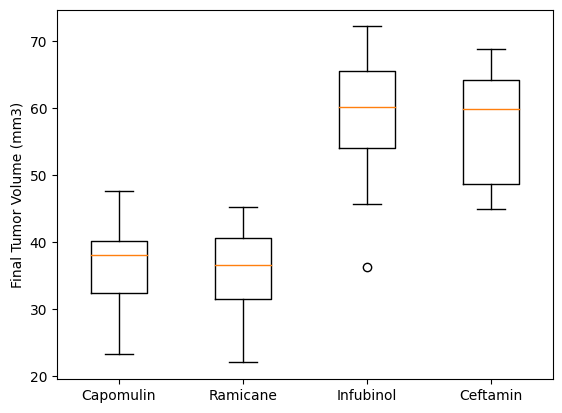

In [17]:
# create a box plot of the tumor volume data for each regimen

tumor_volume_data = []

# loop through the list of drug regimens and add the tumor volume data to the list
for regimen in regimens:
    tumor_volume_data.append(final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == regimen, 'Tumor Volume (mm3)'])

# create a box plot of the tumor volume data for each regimen
fig, ax = plt.subplots()
ax.boxplot(tumor_volume_data, labels=regimens)

# set the title and labels for the plot
ax.set_ylabel('Final Tumor Volume (mm3)')

# show the plot
plt.show()

## Line and Scatter Plots

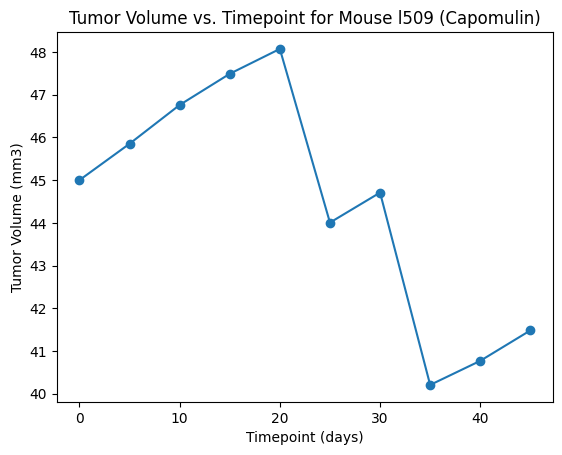

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

import matplotlib.pyplot as plt

# choose a mouse ID to plot
mouse_id = 'l509'

# filter the Capomulin data for the selected mouse ID
mouse_data = data_combine.loc[data_combine['Mouse ID'] == mouse_id]

# create a line plot of tumor volume vs. time point for the selected mouse
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o')

# set the title and labels for the plot
plt.title(f"Tumor Volume vs. Timepoint for Mouse {mouse_id} (Capomulin)")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

# show the plot
plt.show()

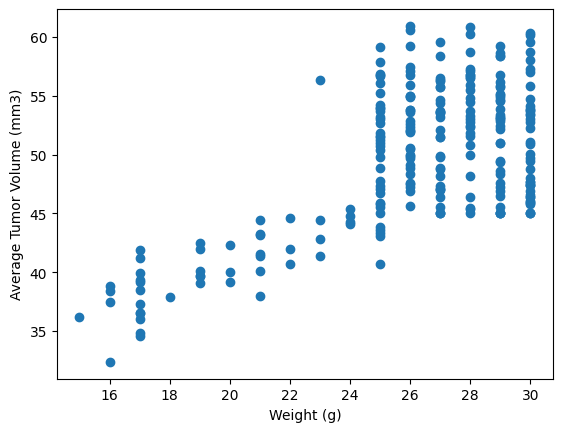

In [23]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin = data_combine[['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)']]
capomulin_avg = capomulin.groupby(['Mouse ID']).mean()

# create a scatter plot of mouse weight vs. average tumor volume for the Capomulin regimen
plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])

# set the title and labels for the plot
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# show the plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


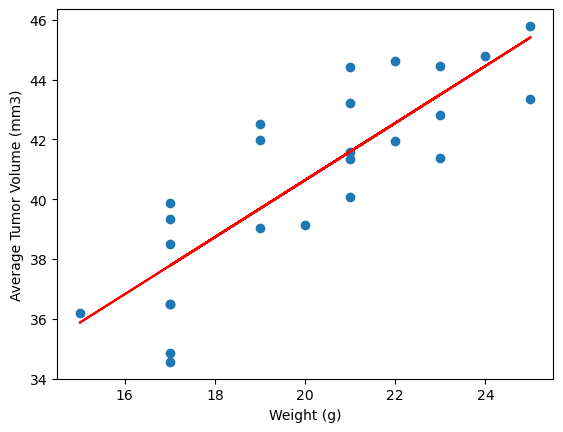

In [ ]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
